# CategorAY Suggestion

**TPA Web 24-2 AI Var 4**

Dataset: https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset

Download test.csv and train.csv, then move it to `ai/data/`

## Dataset Preparation

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
DATA_DIR = '../data/'
TRAIN_CSV_PATH = f'{DATA_DIR}train.csv'
TEST_CSV_PATH = f'{DATA_DIR}test.csv'

print(f"Looking for training data at: {TRAIN_CSV_PATH}")
print(f"Looking for test data at: {TEST_CSV_PATH}")

Looking for training data at: ../data/train.csv
Looking for test data at: ../data/test.csv


In [5]:
try:
    train_df = pd.read_csv(TRAIN_CSV_PATH)
    test_df = pd.read_csv(TEST_CSV_PATH)
    print("Successfully loaded train.csv and test.csv")
except FileNotFoundError:
    print(f"ERROR: CSV files not found. Make sure '{TRAIN_CSV_PATH}' and '{TEST_CSV_PATH}' exist.")
    exit()

Successfully loaded train.csv and test.csv


In [6]:
print("\n--- Training Data Inspection ---")
print("First 5 rows of training data:")
print(train_df.head())
print("\nTraining data information:")
train_df.info()
print("\nTraining data descriptive statistics (for numerical columns, if any):")
print(train_df.describe(include='all')) # Include 'all' to see stats for object types too
print("\nMissing values in training data:")
print(train_df.isnull().sum())


--- Training Data Inspection ---
First 5 rows of training data:
   Class Index                                              Title  \
0            3  Wall St. Bears Claw Back Into the Black (Reuters)   
1            3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2            3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3            3  Iraq Halts Oil Exports from Main Southern Pipe...   
4            3  Oil prices soar to all-time record, posing new...   

                                         Description  
0  Reuters - Short-sellers, Wall Street's dwindli...  
1  Reuters - Private investment firm Carlyle Grou...  
2  Reuters - Soaring crude prices plus worries\ab...  
3  Reuters - Authorities have halted oil export\f...  
4  AFP - Tearaway world oil prices, toppling reco...  

Training data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  -----

In [7]:
print("\n--- Test Data Inspection ---")
print("First 5 rows of test data:")
print(test_df.head())
print("\nTest data information:")
test_df.info()
print("\nMissing values in test data:")
print(test_df.isnull().sum())


--- Test Data Inspection ---
First 5 rows of test data:
   Class Index                                              Title  \
0            3                  Fears for T N pension after talks   
1            4  The Race is On: Second Private Team Sets Launc...   
2            4      Ky. Company Wins Grant to Study Peptides (AP)   
3            4      Prediction Unit Helps Forecast Wildfires (AP)   
4            4        Calif. Aims to Limit Farm-Related Smog (AP)   

                                         Description  
0  Unions representing workers at Turner   Newall...  
1  SPACE.com - TORONTO, Canada -- A second\team o...  
2  AP - A company founded by a chemistry research...  
3  AP - It's barely dawn when Mike Fitzpatrick st...  
4  AP - Southern California's smog-fighting agenc...  

Test data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       ---------

In [8]:
train_df['text'] = train_df['Title'] + " " + train_df['Description']
test_df['text'] = test_df['Title'] + " " + test_df['Description']

print("\n--- Combined 'text' column created ---")
print("First 5 rows of training data with 'text' column:")
print(train_df[['Class Index', 'text']].head())


--- Combined 'text' column created ---
First 5 rows of training data with 'text' column:
   Class Index                                               text
0            3  Wall St. Bears Claw Back Into the Black (Reute...
1            3  Carlyle Looks Toward Commercial Aerospace (Reu...
2            3  Oil and Economy Cloud Stocks' Outlook (Reuters...
3            3  Iraq Halts Oil Exports from Main Southern Pipe...
4            3  Oil prices soar to all-time record, posing new...


In [9]:
print("\n--- Class Distribution in Training Data ---")
class_counts = train_df['Class Index'].value_counts().sort_index()
print(class_counts)


--- Class Distribution in Training Data ---
1    30000
2    30000
3    30000
4    30000
Name: Class Index, dtype: int64


In [10]:
class_map = {1: "World", 2: "Sports", 3: "Business", 4: "Sci/Tech"}
train_df['Class Name'] = train_df['Class Index'].map(class_map)
test_df['Class Name'] = test_df['Class Index'].map(class_map)

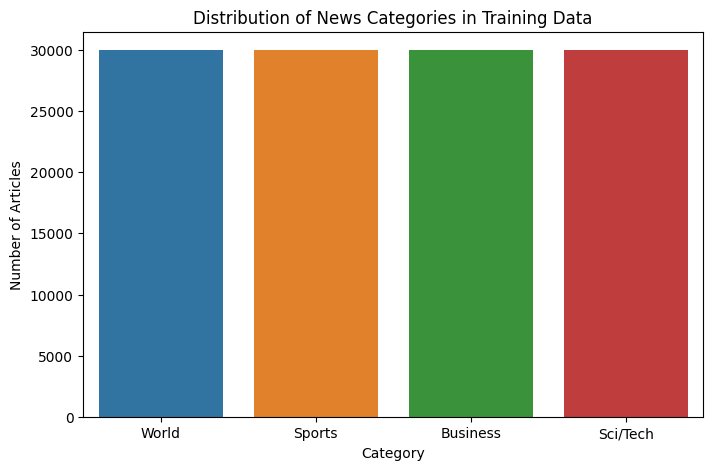

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Class Name', data=train_df, order=class_map.values()) # Use class_map values for order
plt.title('Distribution of News Categories in Training Data')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.show()
plt.close()

In [12]:
print("\n--- Initial Text Exploration (First 2 samples per category) ---")
for class_name_val in class_map.values():
    print(f"\nCategory: {class_name_val}")
    sample_texts = train_df[train_df['Class Name'] == class_name_val]['text'].head(2)
    for i, text in enumerate(sample_texts):
        print(f"  Sample {i+1}: {text[:200]}...")


--- Initial Text Exploration (First 2 samples per category) ---

Category: World
  Sample 1: Venezuelans Vote Early in Referendum on Chavez Rule (Reuters) Reuters - Venezuelans turned out early\and in large numbers on Sunday to vote in a historic referendum\that will either remove left-wing P...
  Sample 2: S.Koreans Clash with Police on Iraq Troop Dispatch (Reuters) Reuters - South Korean police used water cannon in\central Seoul Sunday to disperse at least 7,000 protesters\urging the government to reve...

Category: Sports
  Sample 1: Phelps, Thorpe Advance in 200 Freestyle (AP) AP - Michael Phelps took care of qualifying for the Olympic 200-meter freestyle semifinals Sunday, and then found out he had been added to the American tea...
  Sample 2: Reds Knock Padres Out of Wild-Card Lead (AP) AP - Wily Mo Pena homered twice and drove in four runs, helping the Cincinnati Reds beat the San Diego Padres 11-5 on Saturday night. San Diego was knocked...

Category: Business
  Sample 1: Wall

In [13]:
train_df['text_length'] = train_df['text'].apply(len)
print("\n--- Text Length Statistics (Training Data) ---")
print(train_df['text_length'].describe())


--- Text Length Statistics (Training Data) ---
count    120000.000000
mean        236.460025
std          66.529799
min          17.000000
25%         196.000000
50%         232.000000
75%         266.000000
max        1012.000000
Name: text_length, dtype: float64


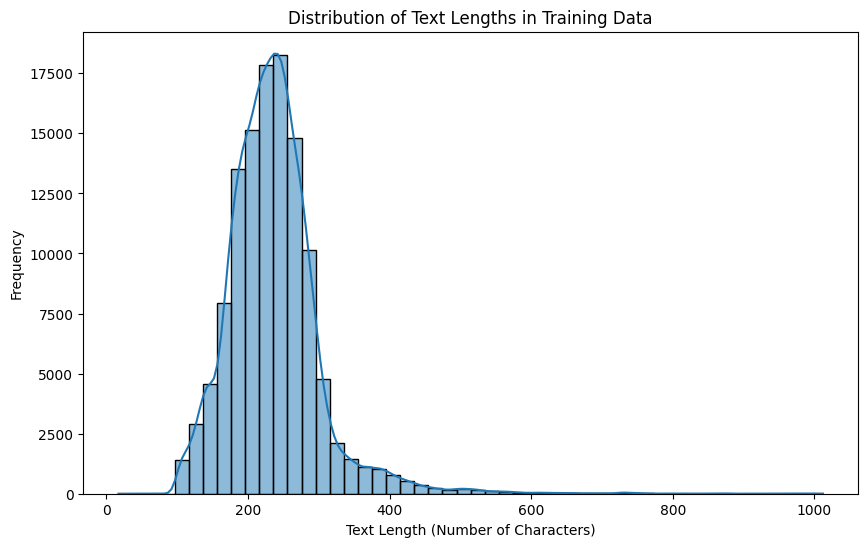

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths in Training Data')
plt.xlabel('Text Length (Number of Characters)')
plt.ylabel('Frequency')
plt.show()
plt.close()

In [15]:
print("\n--- DataFrames are ready for preprocessing ---")
print("Training DataFrame shape:", train_df.shape)
print("Test DataFrame shape:", test_df.shape)


--- DataFrames are ready for preprocessing ---
Training DataFrame shape: (120000, 6)
Test DataFrame shape: (7600, 5)


## Preprocessing

- Lowercase
- Punctuation removal
- Stop words and tokenization will be handled later by TfidfVectorizer

In [16]:
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

In [17]:
translator = str.maketrans('', '', string.punctuation)

def preprocess_text_simple(text_content: str) -> str:
    if not isinstance(text_content, str):
        return ""
    
    # 1. Lowercase
    text_content = text_content.lower()
    
    # 2. Remove Punctuation
    text_content = text_content.translate(translator)
    
    # 3. Remove extra whitespace that might be left after punctuation removal
    text_content = " ".join(text_content.split())
    
    return text_content

In [18]:
sample_text = "Hello World! This is a test text, for the AG_NEWS dataset... 123. How's it going?"
processed_sample = preprocess_text_simple(sample_text)
print(f"Original: {sample_text}")
print(f"Processed: {processed_sample}")

Original: Hello World! This is a test text, for the AG_NEWS dataset... 123. How's it going?
Processed: hello world this is a test text for the agnews dataset 123 hows it going


In [19]:
train_df['text'] = train_df['text'].fillna('')
test_df['text'] = test_df['text'].fillna('')

In [20]:
print("\nApplying preprocessing to training data...")
train_df['processed_text'] = train_df['text'].apply(preprocess_text_simple)


Applying preprocessing to training data...


In [21]:
print("Applying preprocessing to test data...")
test_df['processed_text'] = test_df['text'].apply(preprocess_text_simple)

Applying preprocessing to test data...


In [22]:
print("\nPreprocessing complete.")
print("First 5 rows of training data with 'processed_text':")
print(train_df[['text', 'processed_text']].head())


Preprocessing complete.
First 5 rows of training data with 'processed_text':
                                                text  \
0  Wall St. Bears Claw Back Into the Black (Reute...   
1  Carlyle Looks Toward Commercial Aerospace (Reu...   
2  Oil and Economy Cloud Stocks' Outlook (Reuters...   
3  Iraq Halts Oil Exports from Main Southern Pipe...   
4  Oil prices soar to all-time record, posing new...   

                                      processed_text  
0  wall st bears claw back into the black reuters...  
1  carlyle looks toward commercial aerospace reut...  
2  oil and economy cloud stocks outlook reuters r...  
3  iraq halts oil exports from main southern pipe...  
4  oil prices soar to alltime record posing new m...  


In [23]:
print("\nFirst 5 rows of test data with 'processed_text':")
print(test_df[['text', 'processed_text']].head())


First 5 rows of test data with 'processed_text':
                                                text  \
0  Fears for T N pension after talks Unions repre...   
1  The Race is On: Second Private Team Sets Launc...   
2  Ky. Company Wins Grant to Study Peptides (AP) ...   
3  Prediction Unit Helps Forecast Wildfires (AP) ...   
4  Calif. Aims to Limit Farm-Related Smog (AP) AP...   

                                      processed_text  
0  fears for t n pension after talks unions repre...  
1  the race is on second private team sets launch...  
2  ky company wins grant to study peptides ap ap ...  
3  prediction unit helps forecast wildfires ap ap...  
4  calif aims to limit farmrelated smog ap ap sou...  


### Feature Extraction (Vectorization) with TF-IDF

In [24]:
BASE_DIR = '.'
MODELS_DIR = os.path.join(BASE_DIR, '..', 'models')
os.makedirs(MODELS_DIR, exist_ok=True)

print(f"MODELS_DIR set to: {MODELS_DIR}")

MODELS_DIR set to: .\..\models


In [25]:
vectorizer = TfidfVectorizer(
    max_features=10000,     # Keep the top 10,000 features (words)
    stop_words='english',   # Remove English stop words
    ngram_range=(1, 1),     # Consider individual words (unigrams)
    min_df=5,               # Word must appear in at least 5 documents
    max_df=0.9              # Word must not appear in more than 90% of documents
)

In [26]:
print("Fitting TF-IDF Vectorizer on training data...")
X_train_tfidf = vectorizer.fit_transform(train_df['processed_text'])
print("Training data transformed to TF-IDF features.")
print("Shape of X_train_tfidf:", X_train_tfidf.shape)

Fitting TF-IDF Vectorizer on training data...
Training data transformed to TF-IDF features.
Shape of X_train_tfidf: (120000, 10000)


In [27]:
print("\nTransforming test data with the fitted TF-IDF Vectorizer...")
X_test_tfidf = vectorizer.transform(test_df['processed_text'])
print("Test data transformed to TF-IDF features.")
print("Shape of X_test_tfidf:", X_test_tfidf.shape)


Transforming test data with the fitted TF-IDF Vectorizer...
Test data transformed to TF-IDF features.
Shape of X_test_tfidf: (7600, 10000)


In [28]:
feature_names = vectorizer.get_feature_names_out()
print("\nFirst 100 features (words) in vocabulary:")
print(feature_names[:100])
print("Last 100 features (words) in vocabulary:")
print(feature_names[-100:])


First 100 features (words) in vocabulary:
['00' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '100' '1000'
 '10000' '100000' '100m' '100meter' '100th' '101' '102' '103' '104' '105'
 '106' '107' '108' '10m' '10th' '10year' '10yearold' '11' '110' '1100'
 '112' '114' '115' '117' '11th' '12' '120' '1200' '12000' '121' '123'
 '125' '126' '12th' '13' '130' '133' '135' '136' '13th' '14' '140' '145'
 '146' '146s' '148' '149' '14th' '15' '150' '1500' '15000' '150000' '151'
 '155' '15th' '15year' '16' '160' '1600' '166' '167' '16th' '17' '170'
 '175' '177' '17th' '17yearold' '18' '180' '18month' '18th' '18yearold'
 '19' '1918' '1970s' '1980' '1980s' '1986' '1990' '1990s' '1991' '1992'
 '1994' '1995' '1996']
Last 100 features (words) in vocabulary:
['worse' 'worsening' 'worst' 'worth' 'wouldbe' 'wouldn' 'wouldnt' 'wound'
 'wounded' 'wounding' 'wounds' 'wpp' 'wr' 'wrap' 'wrapped' 'wraps' 'wreck'
 'wreckage' 'wrestling' 'wright' 'wrigley' 'wrist' 'write' 'writedown'
 'writer' 'writers' 'writes

In [29]:
# Convert labels from 1-4 to 0-3
y_train = train_df['Class Index'] - 1
y_test = test_df['Class Index'] - 1

print("Training labels (y_train) shape:", y_train.shape)
print("First 5 training labels (0-indexed):")
print(y_train.head())
print("\nTest labels (y_test) shape:", y_test.shape)
print("First 5 test labels (0-indexed):")
print(y_test.head())

print("\nValue counts for y_train (0-indexed):")
print(y_train.value_counts().sort_index())
print("Value counts for y_test (0-indexed):")
print(y_test.value_counts().sort_index())

# Class mapping (0-indexed)
class_map_0_indexed = {0: "World", 1: "Sports", 2: "Business", 3: "Sci/Tech"}
print("\n0-Indexed Class Map:", class_map_0_indexed)

Training labels (y_train) shape: (120000,)
First 5 training labels (0-indexed):
0    2
1    2
2    2
3    2
4    2
Name: Class Index, dtype: int64

Test labels (y_test) shape: (7600,)
First 5 test labels (0-indexed):
0    2
1    3
2    3
3    3
4    3
Name: Class Index, dtype: int64

Value counts for y_train (0-indexed):
0    30000
1    30000
2    30000
3    30000
Name: Class Index, dtype: int64
Value counts for y_test (0-indexed):
0    1900
1    1900
2    1900
3    1900
Name: Class Index, dtype: int64

0-Indexed Class Map: {0: 'World', 1: 'Sports', 2: 'Business', 3: 'Sci/Tech'}


In [30]:
vectorizer_path = os.path.join(MODELS_DIR, 'tfidf_vectorizer.joblib')
try:
    joblib.dump(vectorizer, vectorizer_path)
    print(f"\nTF-IDF vectorizer saved to: {vectorizer_path}")
except Exception as e:
    print(f"Error saving vectorizer: {e}")


TF-IDF vectorizer saved to: .\..\models\tfidf_vectorizer.joblib


## Model Creation, AI Testing

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Multinomial Naive Bayes

In [32]:
print("\n--- Training Multinomial Naive Bayes Model ---")
nb_model = MultinomialNB(alpha=0.1) # alpha is Laplace smoothing parameter, 0.1 as starting point

print("Fitting Naive Bayes model...")
nb_model.fit(X_train_tfidf, y_train)
print("Naive Bayes model fitted.")


--- Training Multinomial Naive Bayes Model ---
Fitting Naive Bayes model...
Naive Bayes model fitted.


In [33]:
print("\nMaking predictions with Naive Bayes on test set...")
y_pred_nb = nb_model.predict(X_test_tfidf)
print("Predictions made.")


Making predictions with Naive Bayes on test set...
Predictions made.


In [34]:
print("\n--- Multinomial Naive Bayes Evaluation ---")
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy: {accuracy_nb:.4f}")


--- Multinomial Naive Bayes Evaluation ---
Accuracy: 0.8984


In [35]:
print("\nClassification Report:")
target_names_nb = [class_map_0_indexed[i] for i in sorted(class_map_0_indexed.keys())]
print(classification_report(y_test, y_pred_nb, target_names=target_names_nb))


Classification Report:
              precision    recall  f1-score   support

       World       0.91      0.89      0.90      1900
      Sports       0.95      0.98      0.96      1900
    Business       0.87      0.85      0.86      1900
    Sci/Tech       0.87      0.87      0.87      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      7600




Confusion Matrix (Naive Bayes):
[[1694   66   95   45]
 [  18 1863    8   11]
 [  76   19 1609  196]
 [  76   19  143 1662]]


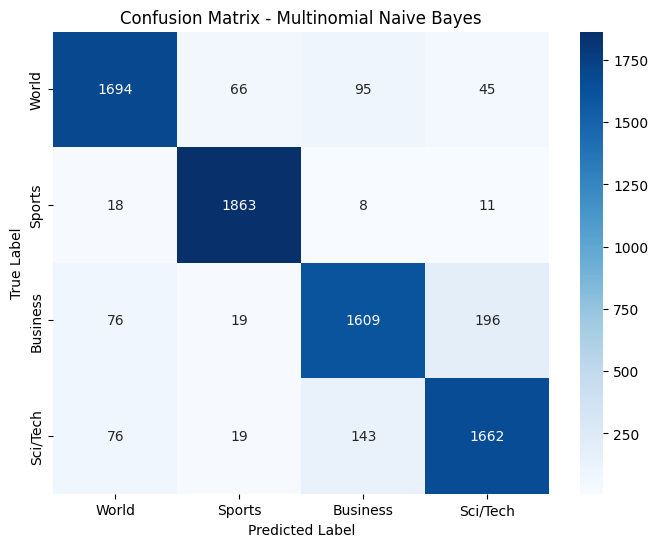

In [36]:
print("\nConfusion Matrix (Naive Bayes):")
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(cm_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names_nb, yticklabels=target_names_nb)
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
plt.close()

In [37]:
nb_model_path = os.path.join(MODELS_DIR, 'naive_bayes_model.joblib')
try:
    joblib.dump(nb_model, nb_model_path)
    print(f"\nNaive Bayes model saved to: {nb_model_path}")
except Exception as e:
    print(f"Error saving Naive Bayes model: {e}")


Naive Bayes model saved to: .\..\models\naive_bayes_model.joblib


### Logistic Regression

In [39]:
print("\n--- Training Logistic Regression Model ---")
log_reg_model = LogisticRegression(solver='liblinear', random_state=42, C=1.0, max_iter=1000)

print("Fitting Logistic Regression model...")
log_reg_model.fit(X_train_tfidf, y_train)
print("Logistic Regression model fitted.")


--- Training Logistic Regression Model ---
Fitting Logistic Regression model...
Logistic Regression model fitted.


In [40]:
print("\nMaking predictions with Logistic Regression on test set...")
y_pred_log_reg = log_reg_model.predict(X_test_tfidf)
print("Predictions made.")


Making predictions with Logistic Regression on test set...
Predictions made.


In [41]:
print("\n--- Logistic Regression Evaluation ---")
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Accuracy: {accuracy_log_reg:.4f}")


--- Logistic Regression Evaluation ---
Accuracy: 0.9118


In [42]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg, target_names=target_names_nb))


Classification Report:
              precision    recall  f1-score   support

       World       0.93      0.91      0.92      1900
      Sports       0.95      0.98      0.97      1900
    Business       0.88      0.87      0.88      1900
    Sci/Tech       0.89      0.88      0.89      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600




Confusion Matrix (Logistic Regression):
[[1722   55   79   44]
 [  15 1867   10    8]
 [  60   19 1661  160]
 [  58   26  136 1680]]


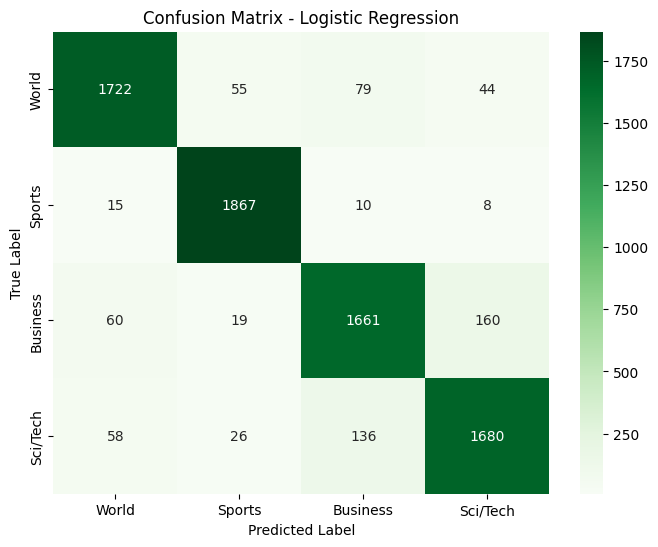

In [43]:
print("\nConfusion Matrix (Logistic Regression):")
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print(cm_log_reg)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Greens',
            xticklabels=target_names_nb, yticklabels=target_names_nb)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
plt.close()

In [44]:
log_reg_model_path = os.path.join(MODELS_DIR, 'logistic_regression_model.joblib')
try:
    joblib.dump(log_reg_model, log_reg_model_path)
    print(f"\nLogistic Regression model saved to: {log_reg_model_path}")
except Exception as e:
    print(f"Error saving Logistic Regression model: {e}")


Logistic Regression model saved to: .\..\models\logistic_regression_model.joblib


### Model Selection

In [45]:
print("\n--- Model Performance Summary ---")
print(f"Multinomial Naive Bayes Accuracy: {accuracy_nb:.4f}")
print(f"Logistic Regression Accuracy:     {accuracy_log_reg:.4f}")

print("\nNaive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb, target_names=target_names_nb))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg, target_names=target_names_nb))


--- Model Performance Summary ---
Multinomial Naive Bayes Accuracy: 0.8984
Logistic Regression Accuracy:     0.9118

Naive Bayes Classification Report:
               precision    recall  f1-score   support

       World       0.91      0.89      0.90      1900
      Sports       0.95      0.98      0.96      1900
    Business       0.87      0.85      0.86      1900
    Sci/Tech       0.87      0.87      0.87      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      7600


Logistic Regression Classification Report:
               precision    recall  f1-score   support

       World       0.93      0.91      0.92      1900
      Sports       0.95      0.98      0.97      1900
    Business       0.88      0.87      0.88      1900
    Sci/Tech       0.89      0.88      0.89      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0

In [48]:
chosen_model = log_reg_model
chosen_model_name = 'logistic_regression'

final_model_path = os.path.join(MODELS_DIR, 'news_classifier_model.joblib')
final_vectorizer_path = os.path.join(MODELS_DIR, 'tfidf_vectorizer.joblib')

In [ ]:
try:
    joblib.dump(chosen_model, final_model_path)
    print(f"\nChosen model ({chosen_model_name}) saved as: {final_model_path}")
    if os.path.exists(final_vectorizer_path):
        print(f"TF-IDF vectorizer already saved at: {final_vectorizer_path}")
    else:
        print(f"ERROR: TF-IDF vectorizer not found at {final_vectorizer_path}.")
except Exception as e:
    print(f"Error saving the chosen model: {e}")


Chosen model (logistic_regression) saved as: .\..\models\news_classifier_model.joblib
TF-IDF vectorizer already saved at: .\..\models\tfidf_vectorizer.joblib


## AI Performance

In [50]:
import time

In [53]:
print(f"\n--- Evaluating Prediction Speed for: {type(chosen_model).__name__} ---")

num_test_samples = X_test_tfidf.shape[0]
print(f"Number of test samples: {num_test_samples}")

start_time = time.time()
y_pred_speed_test = chosen_model.predict(X_test_tfidf)
end_time = time.time()

total_prediction_time = end_time - start_time
avg_prediction_time_per_sample = total_prediction_time / num_test_samples

print(f"Total time to predict on {num_test_samples} test samples: {total_prediction_time:.4f} seconds")
print(f"Average prediction time per sample: {avg_prediction_time_per_sample * 1000:.4f} milliseconds")


--- Evaluating Prediction Speed for: LogisticRegression ---
Number of test samples: 7600
Total time to predict on 7600 test samples: 0.0029 seconds
Average prediction time per sample: 0.0004 milliseconds


In [55]:
# Simulate predicting on single instances, which is more representative of an API call
num_single_predictions = 1000
if num_single_predictions > num_test_samples:
    num_single_predictions = num_test_samples

single_prediction_times = []
for i in range(num_single_predictions):
    sample = X_test_tfidf[i]
    start_sample_time = time.time()
    chosen_model.predict(sample)
    end_sample_time = time.time()
    single_prediction_times.append(end_sample_time - start_sample_time)

avg_single_pred_time = sum(single_prediction_times) / len(single_prediction_times)
print(f"\nAverage time for a single sample prediction (over {num_single_predictions} samples): {avg_single_pred_time * 1000:.4f} milliseconds")


Average time for a single sample prediction (over 1000 samples): 0.0862 milliseconds


In [56]:
final_model_path = os.path.join(MODELS_DIR, 'news_classifier_model.joblib')
final_vectorizer_path = os.path.join(MODELS_DIR, 'tfidf_vectorizer.joblib')

if os.path.exists(final_model_path):
    model_size_bytes = os.path.getsize(final_model_path)
    model_size_kb = model_size_bytes / 1024
    model_size_mb = model_size_kb / 1024
    print(f"\nChosen Model ({type(chosen_model).__name__}) size: {model_size_bytes} bytes ({model_size_kb:.2f} KB / {model_size_mb:.2f} MB)")
else:
    print(f"Model file not found at: {final_model_path}")

if os.path.exists(final_vectorizer_path):
    vectorizer_size_bytes = os.path.getsize(final_vectorizer_path)
    vectorizer_size_kb = vectorizer_size_bytes / 1024
    vectorizer_size_mb = vectorizer_size_kb / 1024
    print(f"TF-IDF Vectorizer size: {vectorizer_size_bytes} bytes ({vectorizer_size_kb:.2f} KB / {vectorizer_size_mb:.2f} MB)")
else:
    print(f"Vectorizer file not found at: {final_vectorizer_path}")


Chosen Model (LogisticRegression) size: 321034 bytes (313.51 KB / 0.31 MB)
TF-IDF Vectorizer size: 2378235 bytes (2322.50 KB / 2.27 MB)


## Input Prediction

In [58]:
import numpy as np

In [57]:
final_model_path = os.path.join(MODELS_DIR, 'news_classifier_model.joblib')
final_vectorizer_path = os.path.join(MODELS_DIR, 'tfidf_vectorizer.joblib')

try:
    loaded_model = joblib.load(final_model_path)
    loaded_vectorizer = joblib.load(final_vectorizer_path)
    print(f"Successfully loaded model from {final_model_path} and vectorizer from {final_vectorizer_path}")
except FileNotFoundError:
    print(f"ERROR: Model or vectorizer not found at {final_model_path} or {final_vectorizer_path}")
    exit()
except Exception as e:
    print(f"ERROR: Failed to load model or vectorizer: {e}")
    exit()

Successfully loaded model from .\..\models\news_classifier_model.joblib and vectorizer from .\..\models\tfidf_vectorizer.joblib


In [ ]:
def predict_category(text_input):
    processed_text = preprocess_text_simple(text_input)
    
    text_tfidf = loaded_vectorizer.transform([processed_text])
    
    prediction = loaded_model.predict(text_tfidf)[0]
    print(prediction)
    
    probabilities = loaded_model.predict_proba(text_tfidf)[0]
    
    class_map_0_indexed = {0: "World", 1: "Sports", 2: "Business", 3: "Sci/Tech"}
    predicted_class = class_map_0_indexed[prediction]
    
    top_3_indices = np.argsort(probabilities)[-3:][::-1]
    top_3_classes = [(class_map_0_indexed[i], probabilities[i]) for i in top_3_indices]
    
    return predicted_class, top_3_classes

In [74]:
print("\n--- Category Suggestion Tool ---")
print("Enter a thread.")
print("Type 'exit' to quit.")
while True:
    user_input = input("Enter text: ")
    if user_input.lower() == 'exit':
        print("Exiting prediction tool. Goodbye!")
        break
    
    if not user_input.strip():
        print("Error: Input cannot be empty. Please try again.")
        continue
    
    print(f"\nThread content: {user_input}")
    predicted_class, top_3_classes = predict_category(user_input)
    print(f"Predicted Category: {predicted_class}")
    print("Top 3 Category Probabilities:")
    for class_name, prob in top_3_classes:
        print(f"  {class_name}: {prob:.4f}")
    print()


--- Category Suggestion Tool ---
Enter a thread.
Type 'exit' to quit.

Thread content: I love the USA, it's the best country
[0]
True
<class 'numpy.ndarray'>
0
Predicted Category: World
Top 3 Category Probabilities:
  World: 0.4241
  Sci/Tech: 0.3394
  Sports: 0.1443

Exiting prediction tool. Goodbye!
